In [24]:
import random

class Item:
    def __init__(self, peso, valor):
        self.peso = peso
        self.valor = valor

class MochilaGenetica:
    def __init__(self, tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes):
        self.tamanho_mochila = tamanho_mochila
        self.itens = itens
        self.tamanho_populacao = tamanho_populacao
        self.taxa_cruzamento = taxa_cruzamento
        self.taxa_mutacao = taxa_mutacao
        self.taxa_elitismo = taxa_elitismo
        self.num_geracoes = num_geracoes
        self.populacao = []

    def criar_cromossomo(self):
        return [random.choice([0, 1]) for _ in range(len(self.itens))]

    def calcular_fitness(self, cromossomo):
        peso_total = sum(cromossomo[i] * self.itens[i].peso for i in range(len(cromossomo)))
        valor_total = sum(cromossomo[i] * self.itens[i].valor for i in range(len(cromossomo)))

        if peso_total > self.tamanho_mochila:
            return valor_total * 0.1  # Penalizar soluções inválidas
        else:
            return valor_total

    def selecao(self):
        torneio = random.sample(self.populacao, 2)
        return max(torneio, key=lambda cromossomo: self.calcular_fitness(cromossomo))

    def cruzamento(self, pai1, pai2):
        ponto_corte = random.randint(1, len(pai1) - 1)
        filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
        filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
        return filho1, filho2

    def mutacao(self, cromossomo):
        posicao = random.randint(0, len(cromossomo) - 1)
        cromossomo[posicao] = 1 if cromossomo[posicao] == 0 else 0
        return cromossomo

    def solve_knapsack(self):
        fitness_evolution = []  # List to store fitness values for each generation
        population_fitness = []  # List to store fitness values for each individual in the population

        # Inicializar população aleatória
        self.populacao = [self.criar_cromossomo() for _ in range(self.tamanho_populacao)]

        for _ in range(self.num_geracoes):
            nova_populacao = []
            generation_fitness = []  # List to store fitness values for individuals in the current generation

            # Elitismo: manter os melhores indivíduos na nova população
            num_elitismo = int(self.taxa_elitismo * self.tamanho_populacao)
            melhores_cromossomos = sorted(self.populacao, key=lambda cromossomo: self.calcular_fitness(cromossomo), reverse=True)[:num_elitismo]
            nova_populacao.extend(melhores_cromossomos)

            # Calcular fitness para indivíduos no elitismo
            for cromossomo in melhores_cromossomos:
                generation_fitness.append(self.calcular_fitness(cromossomo))

            # Completar a nova população com filhos de cruzamento e indivíduos mutados
            while len(nova_populacao) < self.tamanho_populacao:
                pai1 = self.selecao()
                pai2 = self.selecao()

                if random.random() < self.taxa_cruzamento:
                    filho1, filho2 = self.cruzamento(pai1, pai2)
                else:
                    filho1, filho2 = pai1, pai2

                if random.random() < self.taxa_mutacao:
                    filho1 = self.mutacao(filho1)
                if random.random() < self.taxa_mutacao:
                    filho2 = self.mutacao(filho2)

                nova_populacao.extend([filho1, filho2])
                generation_fitness.extend([self.calcular_fitness(filho1), self.calcular_fitness(filho2)])

            # Armazenar fitness values for each individual in the current generation
            population_fitness.append(generation_fitness)

            self.populacao = nova_populacao

        # Construir a lista de itens selecionados com base no melhor cromossomo
        melhor_cromossomo = max(self.populacao, key=lambda cromossomo: self.calcular_fitness(cromossomo))
        melhor_valor = self.calcular_fitness(melhor_cromossomo)
        itens_selecionados = [self.itens[i] for i in range(len(melhor_cromossomo)) if melhor_cromossomo[i] == 1]

        # Retornar uma tupla com a lista de fitness values para cada indivíduo em cada geração, o melhor cromossomo e a lista de itens selecionados
        return population_fitness, (melhor_valor, sum(melhor_cromossomo[i] * self.itens[i].peso for i in range(len(melhor_cromossomo))), melhor_cromossomo), itens_selecionados



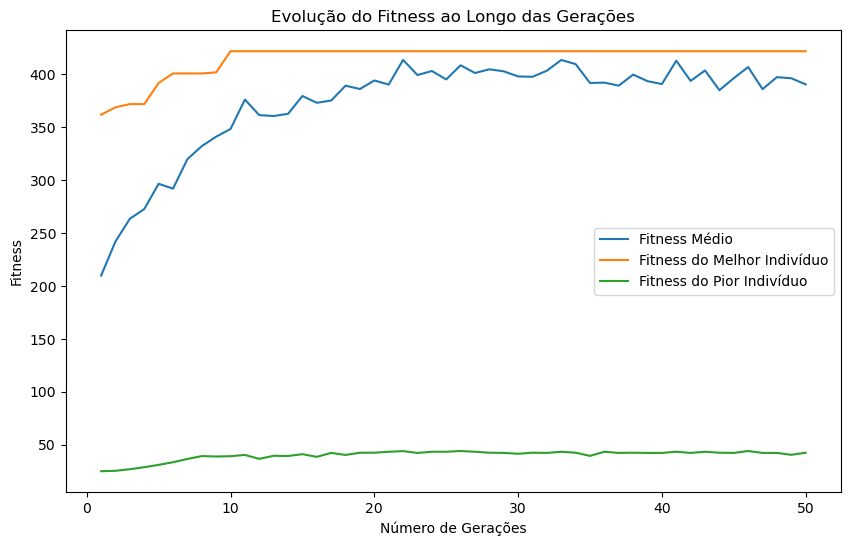

Melhor solução encontrada:
Valor: 422, Peso: 48, Itens: [24, 26, 3, 30, 34, 20, 39, 18, 12, 27, 19, 30, 24, 1, 34, 45, 10, 49, 42, 22]


In [27]:
import random
import matplotlib.pyplot as plt


def executar_algoritmo(tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes):
    mochila_genetica = MochilaGenetica(tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes)
    fitness_avg = []
    fitness_best = []
    fitness_worst = []

    population_fitness, best_solution, _ = mochila_genetica.solve_knapsack()

    for generation_fitness in population_fitness:
        avg_fitness = sum(generation_fitness) / len(generation_fitness)
        best_fitness = max(generation_fitness)
        worst_fitness = min(generation_fitness)

        fitness_avg.append(avg_fitness)
        fitness_best.append(best_fitness)
        fitness_worst.append(worst_fitness)

    return fitness_avg, fitness_best, fitness_worst, best_solution

# Parâmetros do problema
tamanho_mochila = 50
itens = [Item(random.randint(1, 10), random.randint(1, 50)) for _ in range(20)]
tamanho_populacao = 100
taxa_cruzamento = 0.8
taxa_mutacao = 0.2
taxa_elitismo = 0.1
num_geracoes = 50

# Executar o algoritmo
fitness_avg, fitness_best, fitness_worst, best_solution = executar_algoritmo(tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes)

# Plotar as curvas de fitness
geracoes = list(range(1, num_geracoes + 1))

plt.figure(figsize=(10, 6))
plt.plot(geracoes, fitness_avg, label='Fitness Médio')
plt.plot(geracoes, fitness_best, label='Fitness do Melhor Indivíduo')
plt.plot(geracoes, fitness_worst, label='Fitness do Pior Indivíduo')
plt.xlabel('Número de Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.title('Evolução do Fitness ao Longo das Gerações')
plt.show()

print("Melhor solução encontrada:")
print("Valor: {}, Peso: {}, Itens: {}".format(best_solution[0], best_solution[1], [itens[i].valor for i in range(len(best_solution[2]))]))



In [32]:
import random
from tabulate import tabulate
import numpy as np

# ... (definição das classes Item e MochilaGenetica permanece igual)

def executar_algoritmo_10_vezes(tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes, num_execucoes=10):
    resultados = []

    for i in range(num_execucoes):
        mochila_genetica = MochilaGenetica(tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes)
        _, melhor_solucao, _ = mochila_genetica.solve_knapsack()
        resultados.append([i + 1, melhor_solucao[0]])

    return resultados

# Parâmetros do problema
tamanho_mochila = 50
itens = [Item(random.randint(1, 10), random.randint(1, 50)) for _ in range(20)]
tamanho_populacao = 100
taxa_cruzamento = 0.8
taxa_mutacao = 0.2
taxa_elitismo = 0.1
num_geracoes = 50

# Executar o algoritmo 10 vezes e construir a tabela
resultados = executar_algoritmo_10_vezes(tamanho_mochila, itens, tamanho_populacao, taxa_cruzamento, taxa_mutacao, taxa_elitismo, num_geracoes)
tabela = tabulate(resultados, headers=["Execução", "Melhor Valor da Mochila"], tablefmt="pretty")

# Calcular média e desvio padrão dos valores
valores = [r[1] for r in resultados]
media = np.mean(valores)
desvio_padrao = np.std(valores)

# Exibir a tabela formatada e os resultados de média e desvio padrão
print(tabela)
print("Média dos Valores: {:.2f}".format(media))
print("Desvio Padrão dos Valores: {:.2f}".format(desvio_padrao))



+----------+-------------------------+
| Execução | Melhor Valor da Mochila |
+----------+-------------------------+
|    1     |           386           |
|    2     |           374           |
|    3     |           386           |
|    4     |           386           |
|    5     |           386           |
|    6     |           372           |
|    7     |           386           |
|    8     |           371           |
|    9     |           386           |
|    10    |           386           |
+----------+-------------------------+
Média dos Valores: 381.90
Desvio Padrão dos Valores: 6.30


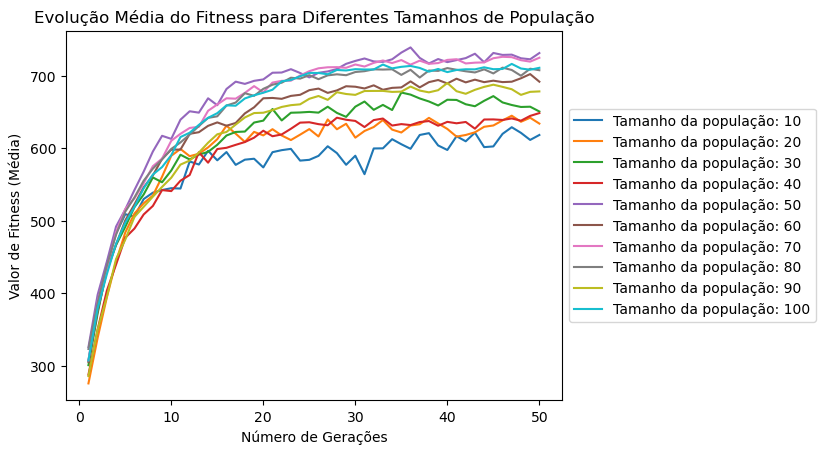

In [47]:
import random
import matplotlib.pyplot as plt

# ... (código da classe Item e MochilaGenetica aqui)

def run_evolution(population_sizes, num_executions=100):
    fitness_data = {}  # Dicionário para armazenar dados de fitness para diferentes tamanhos de população

    for population_size in population_sizes:
        average_fitness_values = []  # Lista para armazenar a média dos valores de fitness para cada geração

        for _ in range(num_executions):
            mochila = MochilaGenetica(
                tamanho_mochila=100,  # Substitua pelo tamanho desejado da mochila
                itens=[Item(peso=random.randint(1, 20), valor=random.randint(1, 100)) for _ in range(20)],  # Exemplo de itens
                tamanho_populacao=population_size,
                taxa_cruzamento=0.8,
                taxa_mutacao=0.2,
                taxa_elitismo=0.1,
                num_geracoes=50  # Número de gerações
            )

            # Resolver o problema da mochila e obter dados de fitness para cada geração
            population_fitness, _, _ = mochila.solve_knapsack()

            # Calcular a média dos valores de fitness para cada geração
            average_fitness = [sum(generation_fitness) / len(generation_fitness) for generation_fitness in population_fitness]
            if len(average_fitness_values) == 0:
                average_fitness_values = average_fitness
            else:
                average_fitness_values = [avg + fitness for avg, fitness in zip(average_fitness_values, average_fitness)]

        # Calcular a média dos valores de fitness para cada geração
        average_fitness_values = [avg / num_executions for avg in average_fitness_values]
        fitness_data[population_size] = average_fitness_values

    # Plotar gráficos para cada tamanho de população
    for population_size, fitness_values in fitness_data.items():
        plt.plot(range(1, len(fitness_values) + 1), fitness_values, label=f'Tamanho da população: {population_size}')

    plt.xlabel('Número de Gerações')
    plt.ylabel('Valor de Fitness (Média)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Posicionar a legenda fora da figura, à direita
    plt.title('Evolução Média do Fitness para Diferentes Tamanhos de População')
    plt.show()

# Exemplo de uso: variar o tamanho da população em 10 valores diferentes (de 10 a 100 com incrementos de 10)
population_sizes = list(range(10, 110, 10))
run_evolution(population_sizes, num_executions=30)


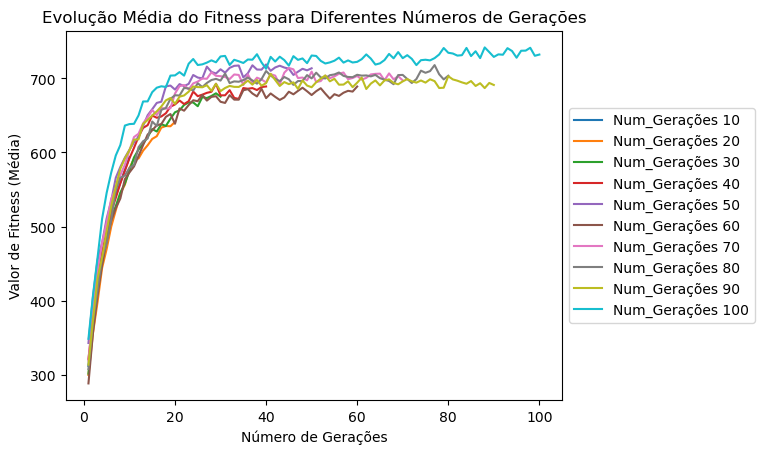

In [48]:
import random
import matplotlib.pyplot as plt

# ... (código da classe Item e MochilaGenetica aqui)

def run_evolution(num_generations_list, num_executions=100):
    fitness_data = {}  # Dicionário para armazenar dados de fitness para diferentes números de gerações

    for num_generations in num_generations_list:
        average_fitness_values = []  # Lista para armazenar a média dos valores de fitness para cada geração

        for _ in range(num_executions):
            mochila = MochilaGenetica(
                tamanho_mochila=100,  # Substitua pelo tamanho desejado da mochila
                itens=[Item(peso=random.randint(1, 20), valor=random.randint(1, 100)) for _ in range(20)],  # Exemplo de itens
                tamanho_populacao=50,  # Tamanho da população fixo em 50
                taxa_cruzamento=0.8,
                taxa_mutacao=0.2,
                taxa_elitismo=0.1,
                num_geracoes=num_generations  # Número de gerações
            )

            # Resolver o problema da mochila e obter dados de fitness para cada geração
            population_fitness, _, _ = mochila.solve_knapsack()

            # Calcular a média dos valores de fitness para cada geração
            average_fitness = [sum(generation_fitness) / len(generation_fitness) for generation_fitness in population_fitness]
            if len(average_fitness_values) == 0:
                average_fitness_values = average_fitness
            else:
                average_fitness_values = [avg + fitness for avg, fitness in zip(average_fitness_values, average_fitness)]

        # Calcular a média dos valores de fitness para cada geração
        average_fitness_values = [avg / num_executions for avg in average_fitness_values]
        fitness_data[num_generations] = average_fitness_values

    # Plotar gráficos para cada número de gerações
    for num_generations, fitness_values in fitness_data.items():
        plt.plot(range(1, len(fitness_values) + 1), fitness_values, label=f'Num_Gerações {num_generations}')

    plt.xlabel('Número de Gerações')
    plt.ylabel('Valor de Fitness (Média)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Posicionar a legenda fora da figura, à direita
    plt.title('Evolução Média do Fitness para Diferentes Números de Gerações')
    plt.show()

# Exemplo de uso: variar o número máximo de gerações em 10 valores diferentes (de 10 a 100 com incrementos de 10)
num_generations_list = list(range(10, 110, 10))
run_evolution(num_generations_list, num_executions=30)


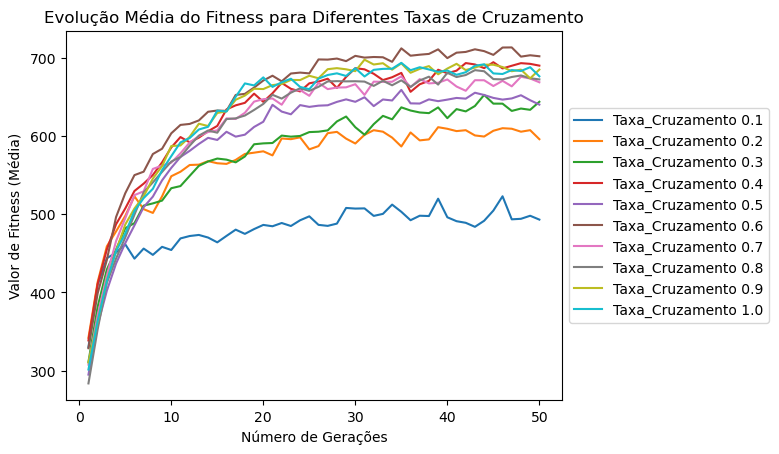

In [49]:
import random
import matplotlib.pyplot as plt

# ... (código da classe Item e MochilaGenetica aqui)

def run_evolution(crossover_rates, num_executions=100):
    fitness_data = {}  # Dicionário para armazenar dados de fitness para diferentes taxas de cruzamento

    for crossover_rate in crossover_rates:
        average_fitness_values = []  # Lista para armazenar a média dos valores de fitness para cada geração

        for _ in range(num_executions):
            mochila = MochilaGenetica(
                tamanho_mochila=100,  # Substitua pelo tamanho desejado da mochila
                itens=[Item(peso=random.randint(1, 20), valor=random.randint(1, 100)) for _ in range(20)],  # Exemplo de itens
                tamanho_populacao=50,  # Tamanho da população fixo em 50
                taxa_cruzamento=crossover_rate,
                taxa_mutacao=0.2,
                taxa_elitismo=0.1,
                num_geracoes=50  # Número de gerações
            )

            # Resolver o problema da mochila e obter dados de fitness para cada geração
            population_fitness, _, _ = mochila.solve_knapsack()

            # Calcular a média dos valores de fitness para cada geração
            average_fitness = [sum(generation_fitness) / len(generation_fitness) for generation_fitness in population_fitness]
            if len(average_fitness_values) == 0:
                average_fitness_values = average_fitness
            else:
                average_fitness_values = [avg + fitness for avg, fitness in zip(average_fitness_values, average_fitness)]

        # Calcular a média dos valores de fitness para cada geração
        average_fitness_values = [avg / num_executions for avg in average_fitness_values]
        fitness_data[crossover_rate] = average_fitness_values

    # Plotar gráficos para cada taxa de cruzamento
    for crossover_rate, fitness_values in fitness_data.items():
        plt.plot(range(1, len(fitness_values) + 1), fitness_values, label=f'Taxa_Cruzamento {crossover_rate}')

    plt.xlabel('Número de Gerações')
    plt.ylabel('Valor de Fitness (Média)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Posicionar a legenda fora da figura, à direita
    plt.title('Evolução Média do Fitness para Diferentes Taxas de Cruzamento')
    plt.show()

# Exemplo de uso: variar a taxa de cruzamento em 10 valores diferentes (de 0.1 a 1.0 com incrementos de 0.1)
crossover_rates = [round(i * 0.1, 1) for i in range(1, 11)]
run_evolution(crossover_rates, num_executions=30)


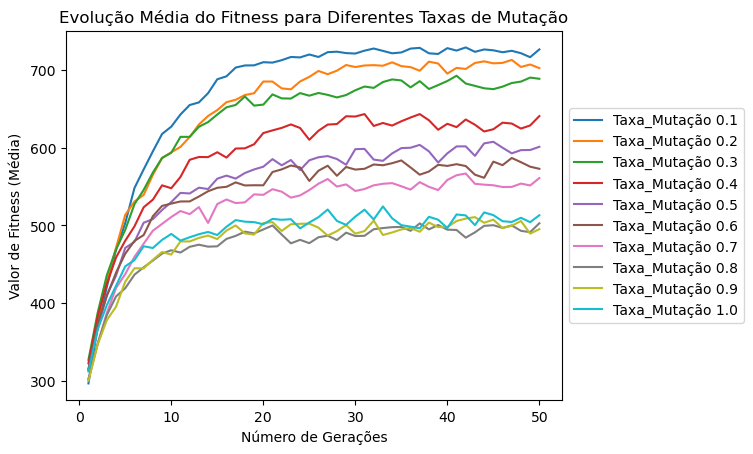

In [50]:
import random
import matplotlib.pyplot as plt

# ... (código da classe Item e MochilaGenetica aqui)

def run_evolution(mutation_rates, num_executions=100):
    fitness_data = {}  # Dicionário para armazenar dados de fitness para diferentes taxas de mutação

    for mutation_rate in mutation_rates:
        average_fitness_values = []  # Lista para armazenar a média dos valores de fitness para cada geração

        for _ in range(num_executions):
            mochila = MochilaGenetica(
                tamanho_mochila=100,  # Substitua pelo tamanho desejado da mochila
                itens=[Item(peso=random.randint(1, 20), valor=random.randint(1, 100)) for _ in range(20)],  # Exemplo de itens
                tamanho_populacao=50,  # Tamanho da população fixo em 50
                taxa_cruzamento=0.8,
                taxa_mutacao=mutation_rate,
                taxa_elitismo=0.1,
                num_geracoes=50  # Número de gerações
            )

            # Resolver o problema da mochila e obter dados de fitness para cada geração
            population_fitness, _, _ = mochila.solve_knapsack()

            # Calcular a média dos valores de fitness para cada geração
            average_fitness = [sum(generation_fitness) / len(generation_fitness) for generation_fitness in population_fitness]
            if len(average_fitness_values) == 0:
                average_fitness_values = average_fitness
            else:
                average_fitness_values = [avg + fitness for avg, fitness in zip(average_fitness_values, average_fitness)]

        # Calcular a média dos valores de fitness para cada geração
        average_fitness_values = [avg / num_executions for avg in average_fitness_values]
        fitness_data[mutation_rate] = average_fitness_values

    # Plotar gráficos para cada taxa de mutação
    for mutation_rate, fitness_values in fitness_data.items():
        plt.plot(range(1, len(fitness_values) + 1), fitness_values, label=f'Taxa_Mutação {mutation_rate}')

    plt.xlabel('Número de Gerações')
    plt.ylabel('Valor de Fitness (Média)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Posicionar a legenda fora da figura, à direita
    plt.title('Evolução Média do Fitness para Diferentes Taxas de Mutação')
    plt.show()

# Exemplo de uso: variar a taxa de mutação em 10 valores diferentes (de 0.1 a 1.0 com incrementos de 0.1)
mutation_rates = [round(i * 0.1, 1) for i in range(1, 11)]
run_evolution(mutation_rates, num_executions=30)


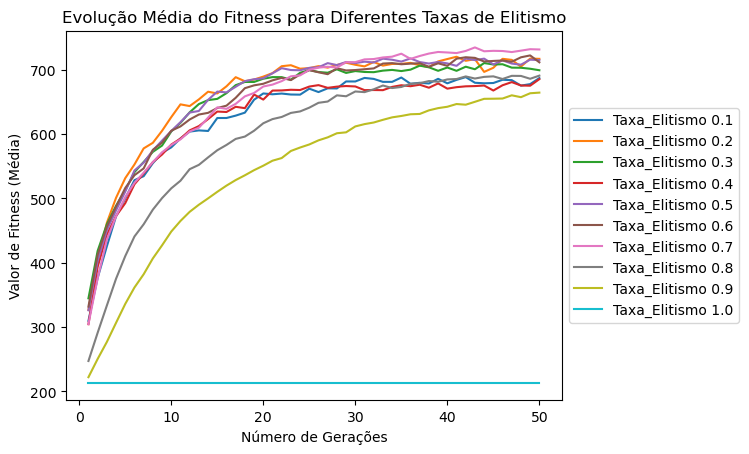

In [51]:
import random
import matplotlib.pyplot as plt

# ... (código da classe Item e MochilaGenetica aqui)

def run_evolution(elitism_rates, num_executions=100):
    fitness_data = {}  # Dicionário para armazenar dados de fitness para diferentes taxas de elitismo

    for elitism_rate in elitism_rates:
        average_fitness_values = []  # Lista para armazenar a média dos valores de fitness para cada geração

        for _ in range(num_executions):
            mochila = MochilaGenetica(
                tamanho_mochila=100,  # Substitua pelo tamanho desejado da mochila
                itens=[Item(peso=random.randint(1, 20), valor=random.randint(1, 100)) for _ in range(20)],  # Exemplo de itens
                tamanho_populacao=50,  # Tamanho da população fixo em 50
                taxa_cruzamento=0.8,
                taxa_mutacao=0.2,
                taxa_elitismo=elitism_rate,
                num_geracoes=50  # Número de gerações
            )

            # Resolver o problema da mochila e obter dados de fitness para cada geração
            population_fitness, _, _ = mochila.solve_knapsack()

            # Calcular a média dos valores de fitness para cada geração
            average_fitness = [sum(generation_fitness) / len(generation_fitness) for generation_fitness in population_fitness]
            if len(average_fitness_values) == 0:
                average_fitness_values = average_fitness
            else:
                average_fitness_values = [avg + fitness for avg, fitness in zip(average_fitness_values, average_fitness)]

        # Calcular a média dos valores de fitness para cada geração
        average_fitness_values = [avg / num_executions for avg in average_fitness_values]
        fitness_data[elitism_rate] = average_fitness_values

    # Plotar gráficos para cada taxa de elitismo
    for elitism_rate, fitness_values in fitness_data.items():
        plt.plot(range(1, len(fitness_values) + 1), fitness_values, label=f'Taxa_Elitismo {elitism_rate}')

    plt.xlabel('Número de Gerações')
    plt.ylabel('Valor de Fitness (Média)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Posicionar a legenda fora da figura, à direita
    plt.title('Evolução Média do Fitness para Diferentes Taxas de Elitismo')
    plt.show()

# Exemplo de uso: variar a taxa de elitismo em 10 valores diferentes (de 0.1 a 1.0 com incrementos de 0.1)
elitism_rates = [round(i * 0.1, 1) for i in range(1, 11)]
run_evolution(elitism_rates, num_executions=30)
